In [16]:
%matplotlib inline

# 训练一个决策树分类模型，对鸢尾花的类别进行自动分类
事前准备:<br>
`conda install pydotplus`<br>
`conda install graphviz`

## 1. 引入必须的包

In [1]:
import numpy as np
import pydotplus
import matplotlib.pyplot as plt

# 从Ipython.display引入Image，用来显示图片
# 可以用于显示pillow的图片
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 加载数据，对鸢尾花数据进行2，8分

In [2]:
# Load data
iris = load_iris()
print(iris.data.shape)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
        test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(120, 4)
(30, 4)


## 3. 训练模型

In [3]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
predict_test = clf.predict(X_test)

In [4]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy is  1.0


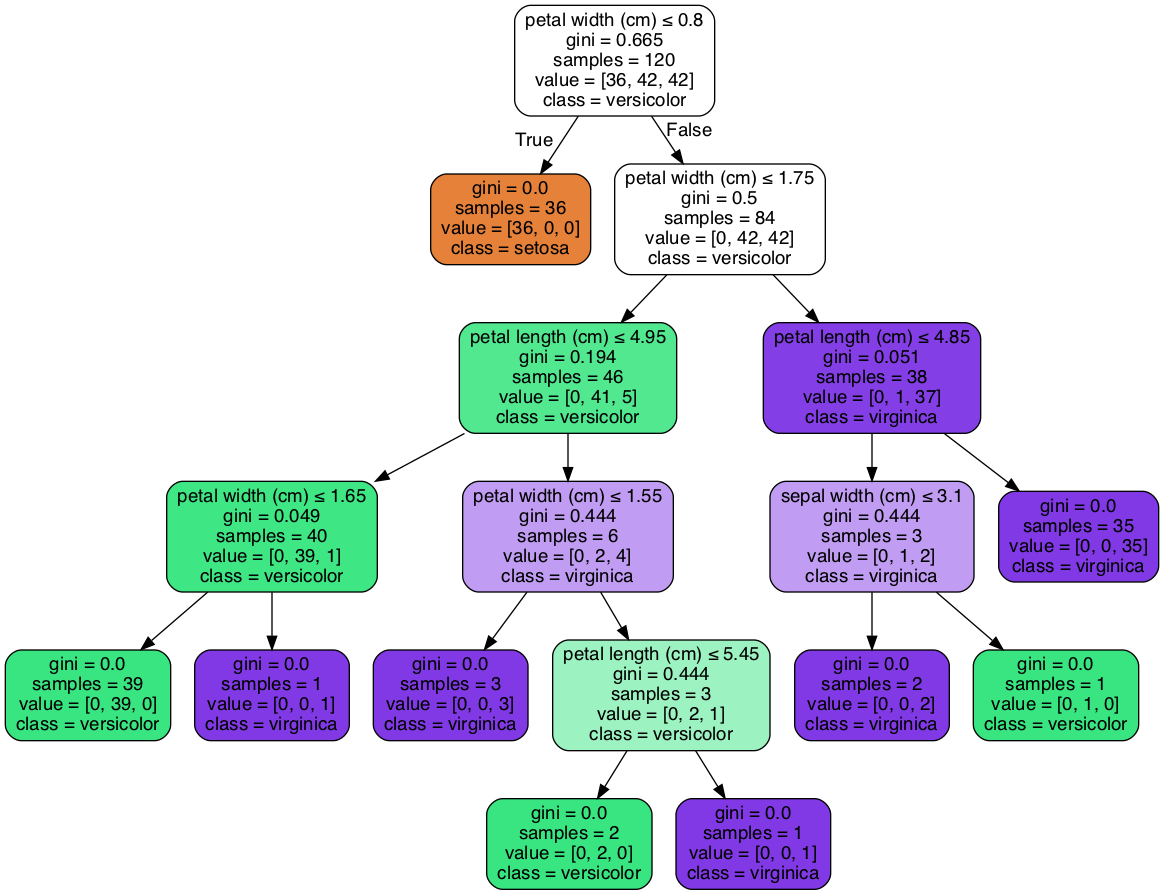

In [7]:
accuracy = clf.score(X_test, y_test)

print('Accuracy is ', accuracy)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())